In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torchvision import transforms, datasets
import matplotlib.pyplot as plt
import torch.optim as optim

In [2]:
train =  datasets.MNIST("", train=True, download=True, transform=transforms.Compose([transforms.ToTensor()]))
test = train =  datasets.MNIST("", train=False, download=True, transform=transforms.Compose([transforms.ToTensor()]))


0it [00:00, ?it/s]

9920512it [00:03, 3172562.83it/s]                             


Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw


0it [00:00, ?it/s]

32768it [00:00, 49363.98it/s]                           
0it [00:00, ?it/s]

Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw


1654784it [00:02, 746768.16it/s]                             
0it [00:00, ?it/s]

Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw


8192it [00:00, 18444.57it/s]            

Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw
Processing...
Done!


In [0]:
trainset = torch.utils.data.DataLoader(train, batch_size=10,shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10,shuffle=True)


In [0]:
for data in trainset:
  print(data)
  break

In [5]:
x,y = data[0][0], data[1][0]
print(y)

tensor(0)


In [6]:
x.shape

torch.Size([1, 28, 28])

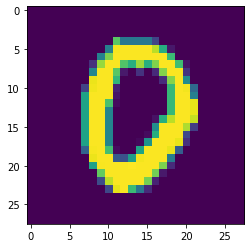

In [7]:
plt.imshow(x.view(28,28))

<BarContainer object of 10 artists>

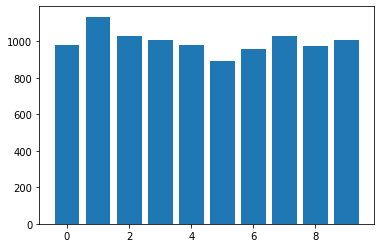

In [8]:
counter_dict = {0:0,1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0}
for data in trainset:
  Xs, ys = data
  for y in ys:
    counter_dict[int(y)] += 1
plt.bar(counter_dict.keys(), counter_dict.values())

In [9]:
class Net(nn.Module):
  def __init__(self):
    super().__init__()
    self.fully_connected1 = nn.Linear(28*28, 64)
    self.fully_connected2 = nn.Linear(64, 64)     # input layer i+1 is 
    self.fully_connected3 = nn.Linear(64, 64)  # output of layer i
    self.fully_connected4 = nn.Linear(64, 10)
  def forward(self, x):
    x = F.relu(self.fully_connected1(x))
    x = F.relu(self.fully_connected2(x))
    x = F.relu(self.fully_connected3(x))
    x = self.fully_connected4(x)
      
    return F.log_softmax(x,dim=1)
      


net = Net()
print(net)



Net(
  (fully_connected1): Linear(in_features=784, out_features=64, bias=True)
  (fully_connected2): Linear(in_features=64, out_features=64, bias=True)
  (fully_connected3): Linear(in_features=64, out_features=64, bias=True)
  (fully_connected4): Linear(in_features=64, out_features=10, bias=True)
)


In [0]:
X = torch.rand((28,28))
X = X.view(-1, 28*28)  

In [11]:
output = net(X)
output

tensor([[-2.1940, -2.2309, -2.3542, -2.2853, -2.3768, -2.3346, -2.3541, -2.2081,
         -2.3284, -2.3821]], grad_fn=<LogSoftmaxBackward>)

In [19]:
optimizer = optim.Adam(net.parameters(),lr=0.01)

EPOCHS = 5

for epoch in range(EPOCHS):
  for data in trainset:
    X,y = data
    net.zero_grad()
    output = net(X.view(-1,28*28))
    loss = F.nll_loss(output,y)
    loss.backward()
    optimizer.step()
  print(loss)


tensor(0.0001, grad_fn=<NllLossBackward>)
tensor(0.3737, grad_fn=<NllLossBackward>)
tensor(0.2072, grad_fn=<NllLossBackward>)
tensor(0.3968, grad_fn=<NllLossBackward>)
tensor(3.1455e-05, grad_fn=<NllLossBackward>)


In [22]:
correct = 0
total = 0
with torch.no_grad():
  for data in trainset:
    X,y = data
    output = net(X.view(-1,784))
    for idx, i in enumerate(output):
      if torch.argmax(i) == y[idx]:
        correct += 1
      total +=1
print("accuracy: ", round(correct/total,3))


accuracy:  0.969


tensor(7)


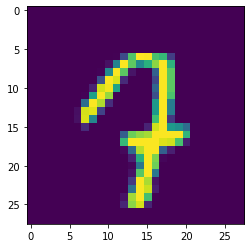

In [27]:
plt.imshow(X[4].view(28,28))
print(torch.argmax(net(X[4].view(-1,784))[0]))

*
*

**CONVNET**

*
*


In [30]:
! wget https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip 

--2019-12-06 12:47:08--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.66.104.142, 2600:1417:3f:4a3::e59, 2600:1417:3f:4ac::e59
Connecting to download.microsoft.com (download.microsoft.com)|23.66.104.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824894548 (787M) [application/octet-stream]
Saving to: ‘kagglecatsanddogs_3367a.zip’

kagglecatsanddogs_3 100%[===================>] 786.68M   113MB/s    in 7.7s    

2019-12-06 12:47:16 (102 MB/s) - ‘kagglecatsanddogs_3367a.zip’ saved [824894548/824894548]



In [31]:
!ls

kagglecatsanddogs_3367a.zip  MNIST  sample_data


In [0]:
! unzip kagglecatsanddogs_3367a.zip

In [34]:
!ls

 kagglecatsanddogs_3367a.zip  'MSR-LA - 3467.docx'  'readme[1].txt'
 MNIST			       PetImages	     sample_data


In [39]:
!ls PetImages

Cat  Dog


In [0]:
import os
import cv2
import numpy as np
from tqdm import tqdm

REBUILD_DATA = True

In [52]:
class DogsVSCats():
  IMG_SIZE = 50
  CATS = "PetImages/Cat"
  DOGS = "PetImages/Dog"
  LABELS = {CATS: 0, DOGS: 1}
  training_data = []
  catcount = 0
  dogcount = 0
  def make_training_data(self):
    for label in self.LABELS:
      try:
        for f in tqdm(os.listdir(label)):
          path = os.path.join(label, f)
          img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
          img = cv2.resize(img,(self.IMG_SIZE,self.IMG_SIZE))
          self.training_data.append([np.array(img),np.eye(2)[self.LABELS[label]]])
          
          if label == self.CATS:
            self.catcount += 1
          elif label == self.DOGS:
            self.dogcount += 1
      except Exception as e:
          pass
    np.random.shuffle(self.training_data)
    np.save("training_data.npy",self.training_data)
    print("Cats: ",self.catcount)
    print("Dogs: ",self.dogcount)

if REBUILD_DATA:
  dogsvscats = DogsVSCats()
  dogsvscats.make_training_data()

  1%|          | 101/12501 [00:00<00:12, 1004.98it/s]

Cats:  44
Dogs:  133
